In [1]:
import numpy as np
import numpy.linalg as la 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

# plt.rcParams['figure.figsize'] = [16,8]
# plt.rcParams.update({'font.size': 18})
%config InlineBackend.figure_format = 'retina'
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [2]:
def get_most_appearing_char(column):
    return column.value_counts().idxmax()

df = pd.read_csv('p4dataset2023.txt', sep=' ', header=None)
most_appearing_chars = df.apply(get_most_appearing_char, axis=0)
X_arr = df.iloc[:,3:].eq(most_appearing_chars[3:]).astype(int)
X_arr_centered = X_arr - X_arr.mean(axis=0)

In [3]:
U, S, VT = la.svd(X_arr_centered, full_matrices=False)
print('U shape:', U.shape, 'S shape:', S.shape, 'VT shape:', VT.shape)

U shape: (995, 995) S shape: (995,) VT shape: (995, 10101)


In [4]:
pca = PCA(n_components=3)
X_pca = pca.fit(X_arr_centered)
XV = X_pca.transform(X_arr_centered)

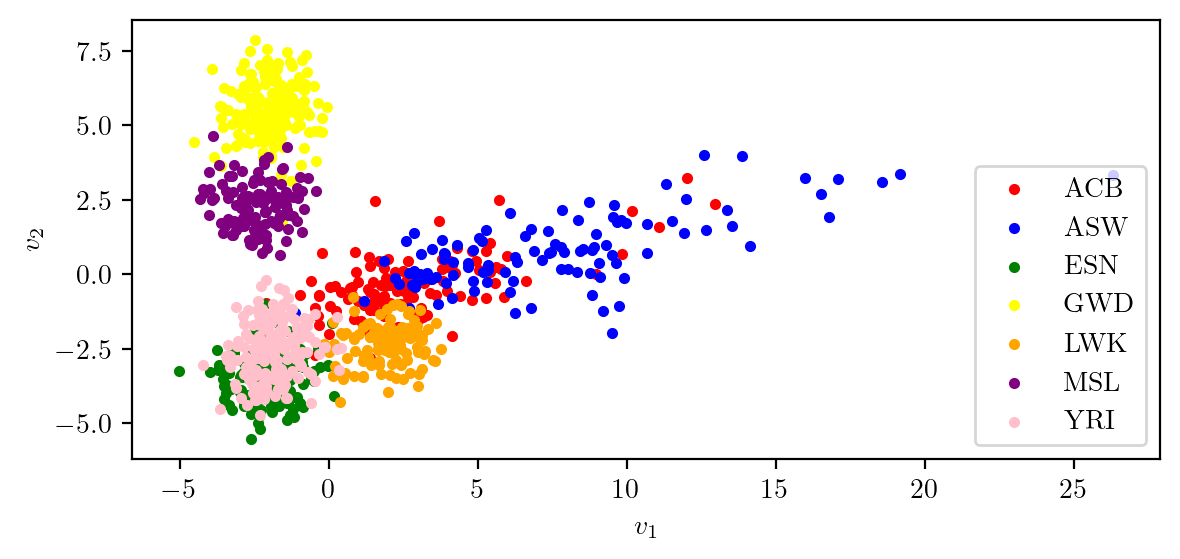

In [5]:
labels_data = np.array(df.iloc[:,2])
labels = np.unique(labels_data)
colors = ['red', 'blue', 'green', 'yellow','orange', 'purple', 'pink', 'brown']
cdict = {keyword: colors[index] for index, keyword in enumerate(labels)}

fig = plt.figure(figsize=(6,3))
ax = plt.axes()
for label in labels:
    idx = np.where(label == labels_data)
    ax.scatter(XV[idx,0], XV[idx,1], marker='.', c=cdict[label], label=label)
ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
ax.set_aspect('equal')
ax.legend(loc="lower right") 
fig.tight_layout()
fig.savefig('report-images/Q1_2.png', dpi=300)

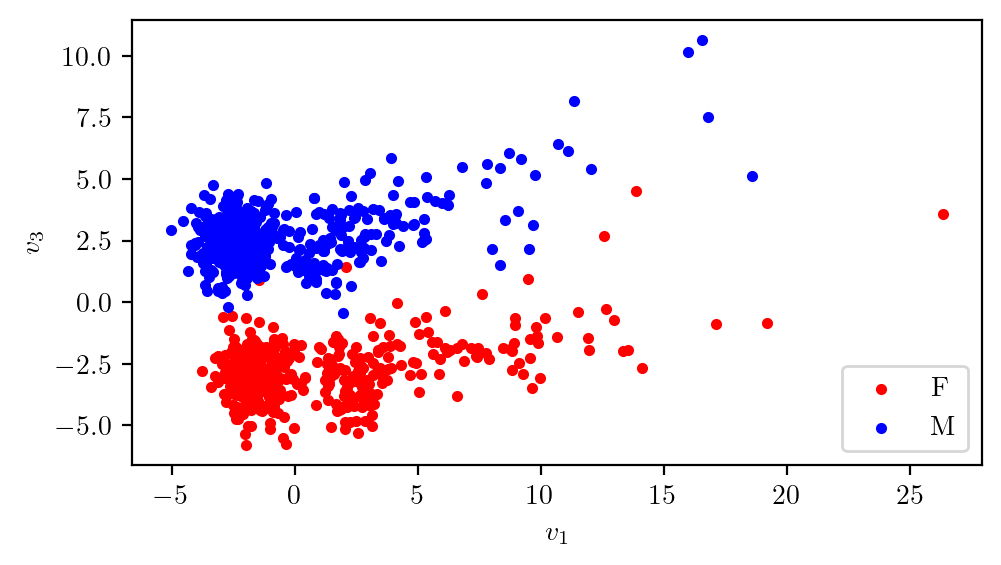

In [6]:
labels_data = np.array(df.iloc[:,1])
labels = np.unique(labels_data)
colors = ['red', 'blue', 'green', 'yellow','orange', 'purple', 'pink', 'brown']
cdict = {keyword: colors[index] for index, keyword in enumerate(labels)}

fig = plt.figure(figsize=(5,3))
ax = plt.axes()
for label in labels:
    idx = np.where(label == labels_data)
    ax.scatter(XV[idx,0], XV[idx,2], marker='.', c=cdict[label], label=label)
ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_3$')
ax.set_aspect('equal')
ax.legend(loc="lower right") 
fig.tight_layout()
fig.savefig('report-images/Q1_4.png', dpi=300)

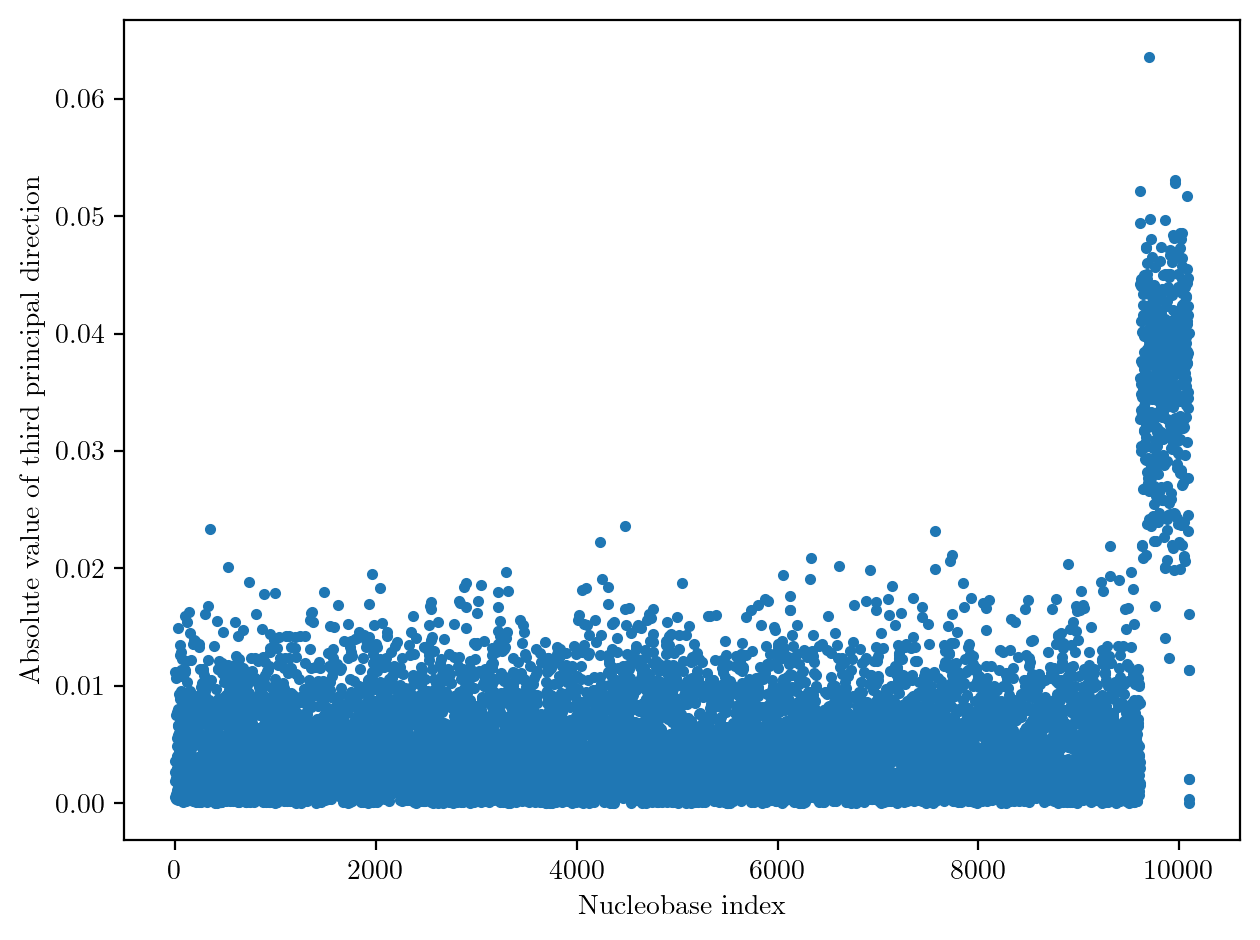

In [22]:
fig = plt.figure()
ax = plt.axes() 
ax.plot(np.abs(X_pca.components_[2]), '.')
ax.set_xlabel('Nucleobase index')
ax.set_ylabel('Absolute value of third principal direction')
fig.tight_layout()
fig.savefig('report-images/Q1_6.png', dpi=300)